## Libraries

In [35]:
import cv2
import os
import numpy as np
import readthermal as rd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

##  Reading a Video file and getting Frames (Images) and writing them to System

In [36]:
# path='../data/'
# input_file_name='ft'
# cap=cv2.VideoCapture(path+input_file_name+".mp4")
# count=0

In [37]:
# shape=(0,0,0)
# shape_set=False
# while(cap.isOpened()):
#     ret,frame=cap.read()
#     if(not shape_set):
#         shape=frame.shape
#         shape_set=True
#     if(ret==True):
#         cv2.imwrite(input_file_name+"frame_"+str(count)+".jpg",frame)
#         count=count+1
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()
# print(shape)

## Reading Thermal Images stored on the System and Storing them in a numpy Array

In [38]:
# np_img=[]

# for i in range(0,640):
#     np_img.append([])
#     for j in range(0,480):
#         np_img[i].append([])

# np.zeros((640,480,count))

# for i in range(0,count):
#     img=cv2.imread("frame_"+str(i)+".jpg")
#     for j in range(0,640):
#         for k in range(0,480):
#             np_img[j][k].append(img[j][k])

# np_img=np.array(np_img, dtype=complex)

In [40]:
shape=(480,640)
count=72

np_img=np.zeros((shape[0],shape[1],count), dtype=complex)
# print(np_img.shape)

for i in range(1,count+1):
    img=rd.extract_thermal(str(i)+".jpg")
#     print(img)
#     break
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            np_img[j][k][i-1]=img[j][k]

## Printing Dimension of numpy Array

In [41]:
print(np_img.shape)
# print(np_img)

(480, 640, 72)


## Calculation of Phase to multipled to Fourier Coefficients of times series value of same pixel in Thermogram (Thermal Image)

In [42]:
z=0.002
k=0.33
c=3780
p=1057
X=k/(c*p)
f=0.01

phase=np.exp(z*np.sqrt(np.pi*f/X)*(1+1j))

## Printing Phase

In [43]:
print(phase)

(1.1362276288627418+3.2396754954446267j)


## Calculation of Blood Flow from pixel values of series of Thermograms

In [44]:
for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.fft.fft(np_img[i][j])*phase

for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.real(np.fft.ifft(np_img[i][j]))

## Printing Blood Flow Values

In [45]:
print(np_img.shape)
np_img=np.real(np_img)
# print(np_img)

(480, 640, 72)


## Seperation Blood Flow values and Creating Images and Writing to System

In [46]:

# scaler = MinMaxScaler(feature_range=(0, 1))

# normalized_data=np.zeros((shape[0],shape[1],count), dtype=float)

# for j in range(0,shape[0]):
#     for k in range(0,shape[1]):
#         l=np_img[j][k]
#         l=l.reshape(len(l), 1)
#         scaler = scaler.fit(l)
#         l=scaler.transform(l)
#         l=l.reshape(1,len(l))
#         normalized_data[j][k]=l


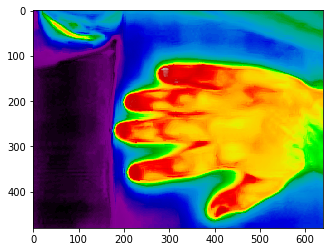

In [47]:
cmap = get_cmap('nipy_spectral')

frame_array=[]

for i in range(0,count):
    img=np.zeros((shape[0],shape[1]))
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            img[j][k]=np_img[j][k][i]
#     col_sums = img.sum(axis=0)
#     new_matrix = img / col_sums[np.newaxis,:absolute]
    img=img/np.amax(img)
    im = plt.imshow(img,cmap=cmap) 
    plt.savefig("out"+str(i)+".jpg")
    frame_array.append(img)

## Generating Blood Flow Video from Blood Flow Images

In [53]:
fps=2
out=cv2.VideoWriter("k_bldf"+".avi",cv2.VideoWriter_fourcc(*'XVID'),fps,(432,288))

for i in range(count):
    img=cv2.imread("out"+str(i)+".jpg")
    out.write(img)

out.release()

## Printing length of Frame Array

In [54]:
print(len(frame_array))

72
